In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Import the basic libraries needed

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\Project\Global Power Plant Database Project.csv.txt")
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Open and read the data

## Data Explanation
- The database covers 908 power plants of India and also includes thermal plants. Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type.
- We have to make two predictions on Fuel type and capacity_mw
- Since all the electricity generation data is in gigawatts-hour and the capacity in megawatt, we have to convert to same measurement.
    - country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification
    - country_long (text): longer form of the country designation
    - name (text): name or title of the power plant, generally in Romanized form
    - gppd_idnr (text): 10 or 12 character identifier for the power plant
    - capacity_mw (number): electrical generating capacity in megawatts
    - latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    - longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    - primary_fuel (text): energy source used in primary electricity generation or export
    - other_fuel1 (text): energy source used in electricity generation or export
    - other_fuel2 (text): energy source used in electricity generation or export
    - other_fuel3 (text): energy source used in electricity generation or export
     - commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
    - owner (text): majority shareholder of the power plant, generally in Romanized form
    - source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    - url (text): web document corresponding to the `source` field
    - geolocation_source (text): attribution for geolocation information
    - wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    - year_of_capacity_data (number): year the capacity information was reported
    - generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
    - generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
    - generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
    - generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
    - generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
    - generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
    - generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
    - generation_data_source (text): attribution for the reported generation information
    - estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
    - estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014 
    - estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015 
    - estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016 
    - estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017 
    - estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
    - estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014 
    - estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
    - estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
    - estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017 

## Data Removal

Remove the following columns:
- country -  Since it is only for India
- country_long - This also denotes the country
- name - Since it is the name of the power plant which is not necessary
- gppd_idnr - This is an identifier name of the powerplant
- latitude - This denoted location
- longitude - This denotes location
- commissioning_year - This is the year of operation
- owner - This denotes the majority shareholder of the powerplant
- source - The entity which reports the data
- url - The source field of the data
- geolocation_source - This provides the geolocation information
- wepp_id - It is a refrence to the plant (this column has only NaN)
- year_of_capacity_data - This column represents the report which has only NaN and 2018
- generation_data_source - This is a reported generation information which has only NaN and 1 value

Since all these information are not helpful for the findings, we are dropping it

In [3]:
data = data.drop(['country','country_long','name','gppd_idnr','latitude','longitude','commissioning_year','owner','source','url','geolocation_source','wepp_id','year_of_capacity_data','generation_data_source'], axis = 1)

Dropped the columns which does not provide information regarding the problem statement

## Exploratory Data Analysis
### Indentifying variables and data types

In [4]:
data.shape

(908, 11)

There are 908 rows with 11 columns after dropping unnecessary columns

In [5]:
data.columns

Index(['capacity_mw', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'estimated_generation_gwh'],
      dtype='object')

These are the column names

## Checking data types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   capacity_mw               908 non-null    float64
 1   primary_fuel              908 non-null    object 
 2   other_fuel1               199 non-null    object 
 3   other_fuel2               1 non-null      object 
 4   other_fuel3               0 non-null      float64
 5   generation_gwh_2013       384 non-null    float64
 6   generation_gwh_2014       401 non-null    float64
 7   generation_gwh_2015       425 non-null    float64
 8   generation_gwh_2016       437 non-null    float64
 9   generation_gwh_2017       443 non-null    float64
 10  estimated_generation_gwh  0 non-null      float64
dtypes: float64(8), object(3)
memory usage: 78.2+ KB


There are object type data in 3 columns - primary_fuel, other_fuel1, other_fuel2 which has to be converted using encoding techniques

## Convert the capacity_mw from mw to gw
Since the capacity_mw column is in megawatt and the electricuty generation data is in gigawatt

In [7]:
data['capacity_mw'] = 0.001*data['capacity_mw']

Now, all the values are in gigawatt

## Missing Value Treatment

In [8]:
data.isnull().sum()

capacity_mw                   0
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
estimated_generation_gwh    908
dtype: int64

##### Remove the following columns:
- estimated_generation_gwh - All the values are NaN
- other_fuel1 - Since it has only 199 data and fuel type cannot be treated becuase this is sensitive data for this type of problem statement
- other_fuel2 - Since 907 values are NaN
- other_fuel3 - Since 908 values are NaN

##### Treat the NaN's for the following using mean value, since all are related to electricity capacity:
- generation_gwh_2013
- generation_gwh_2014
- generation_gwh_2015
- generation_gwh_2016
- generation_gwh_2017

In [9]:
data = data.drop(['estimated_generation_gwh','other_fuel1','other_fuel2','other_fuel3'], axis = 1)

The columns having more NaN's are dropped

In [10]:
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
rows_with_NaN

,capacity_mw,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0.00250,Solar,NaN,NaN,NaN,NaN,NaN
1,0.09800,Coal,NaN,NaN,NaN,NaN,NaN
2,0.03920,Wind,NaN,NaN,NaN,NaN,NaN
13,0.01695,Hydro,NaN,NaN,NaN,NaN,NaN
14,0.00900,Hydro,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
903,1.60000,Coal,NaN,NaN,0.994875,233.59665,865.4
904,0.00300,Solar,NaN,NaN,NaN,NaN,NaN
905,0.02550,Wind,NaN,NaN,NaN,NaN,NaN
906,0.08000,Coal,NaN,NaN,NaN,NaN,NaN


There are 530 rows in total which has NaN. We cannot just remove those rows with NaN because that particular plant has the capacity to generate electricity and it has not generated. This must be taken into account since the fuel type of electricity generation is also considered here.

In [11]:
nan = data.isnull().sum(axis=1)
nan

0      5
1      5
2      5
3      0
4      0
      ..
903    2
904    5
905    5
906    5
907    5
Length: 908, dtype: int64

There are more no. of rows having all 5 years of 0 generation. SO, we cannot take mean plant-wise. Mean has to be taken column-wise

In [12]:
data['generation_gwh_2013'] = data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].mean())
data['generation_gwh_2014'] = data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean())
data['generation_gwh_2015'] = data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean())
data['generation_gwh_2016'] = data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean())
data['generation_gwh_2017'] = data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean())

All NaN's are filled with mean

## Encoding

In [13]:
print(data['primary_fuel'].nunique())

8


In [14]:
data['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [15]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [16]:
for i in data.columns:
    if data[i].dtypes =='object':
        data[i] = enc.fit_transform(data[i].values.reshape(-1,1))
data

,capacity_mw,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0.0025,6.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,0.0980,1.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,0.0392,7.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,0.1350,2.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1.8000,1.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...
903,1.6000,1.0,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,0.0030,6.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,0.0255,7.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,0.0800,1.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


Thus the data has been encoded using ordinal encoder

The fuel types are encoded with the following numbers:
0- Biomass
1- Coal
2- Gas
3- Hydro
4- Nuclear
5- Oil
6- Solar
7- Wind

## Describing the data after encoding

In [17]:
data.describe()

,capacity_mw,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,0.321046,3.205947,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,0.580222,2.281339,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.016837,1.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,0.060000,3.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,0.388125,6.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4.760000,7.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


The data has no null values and are varied. The data has to be tandardised before using to avoid bias

## Correlation

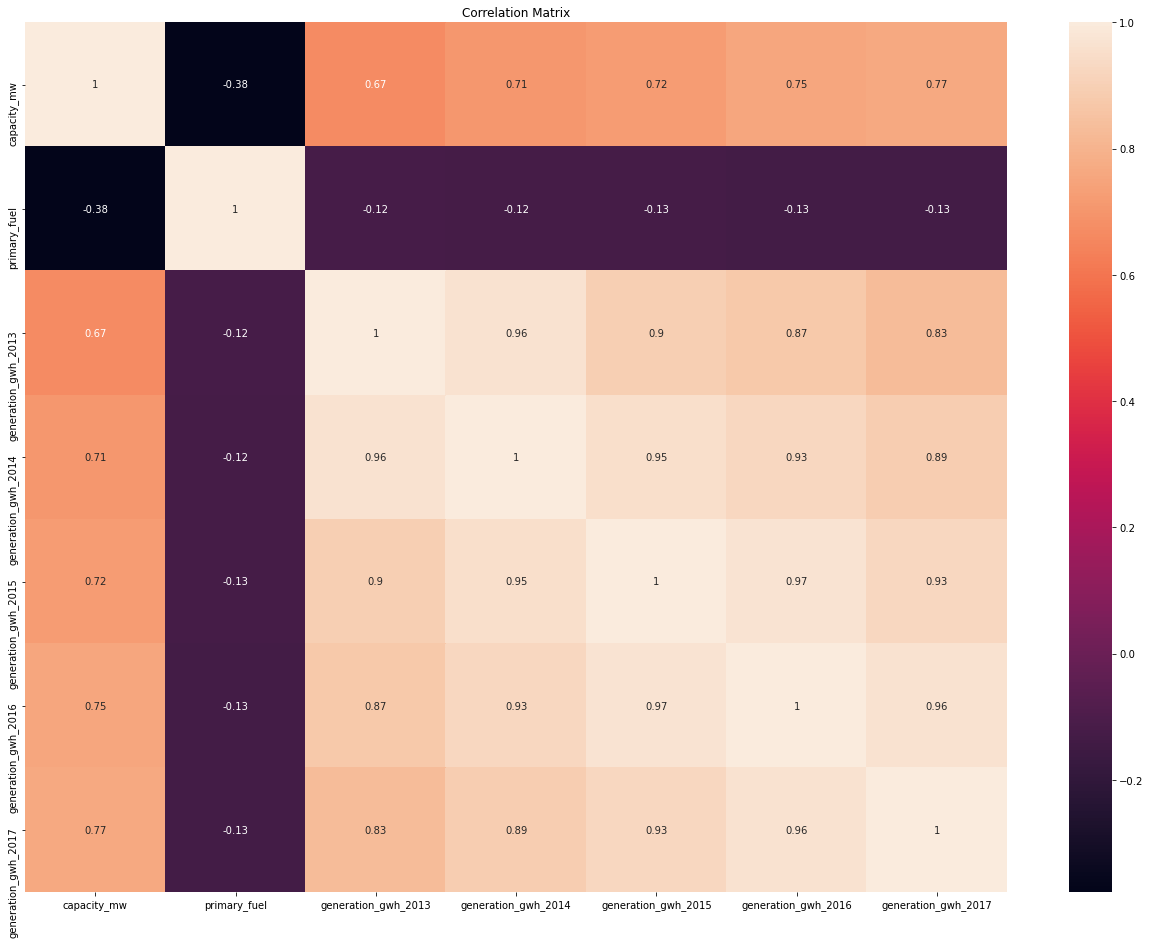

In [18]:
corr_mat = data.corr()
plt.figure(figsize=[22,16])
sns.heatmap(corr_mat,annot = True)
plt.title('Correlation Matrix')
plt.show()

##### There are more no. of highlu positively correlated columns
- generation_gwh_2013 is highly correlated with generation_gwh_2014 with 0.96
- generation_gwh_2014 is highly correlated with generation_gwh_2015 with 0.95
- generation_gwh_2015 is highly correlated with generation_gwh_2016 with 0.97
- generation_gwh_2016 is highly correlated with generation_gwh_2017 with 0.96
##### Though these are highly correlated, we have to confirm its correlation

## Confirming the correlation existence

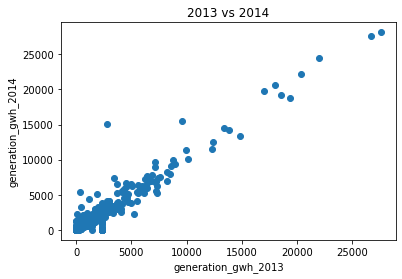

In [19]:
plt.scatter(data.generation_gwh_2013, data.generation_gwh_2014)
plt.xlabel('generation_gwh_2013')
plt.ylabel('generation_gwh_2014')
plt.title ('2013 vs 2014')
plt.show()

Yes, both are very highly correlated

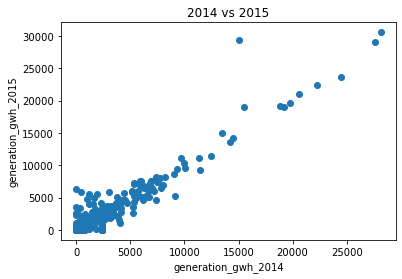

In [20]:
plt.scatter(data.generation_gwh_2014, data.generation_gwh_2015)
plt.xlabel('generation_gwh_2014')
plt.ylabel('generation_gwh_2015')
plt.title ('2014 vs 2015')
plt.show()

Yes, both are very highly correlated

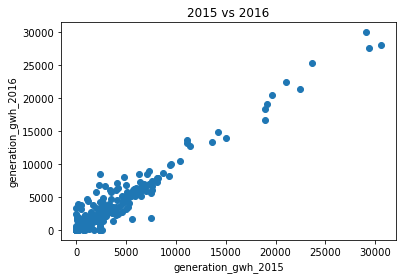

In [21]:
plt.scatter(data.generation_gwh_2015, data.generation_gwh_2016)
plt.xlabel('generation_gwh_2015')
plt.ylabel('generation_gwh_2016')
plt.title ('2015 vs 2016')
plt.show()

Yes, both are very highly correlated

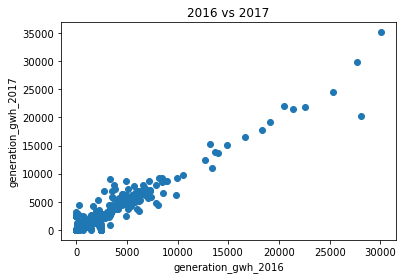

In [22]:
plt.scatter(data.generation_gwh_2016, data.generation_gwh_2017)
plt.xlabel('generation_gwh_2016')
plt.ylabel('generation_gwh_2017')
plt.title ('2016 vs 2017')
plt.show()

Yes, both are very highly correlated

In [23]:
data = data.drop(['generation_gwh_2013','generation_gwh_2015','generation_gwh_2017'],axis=1)

Dropped 2013,2015 and 2017 data to reduce the correlation. Though there will be coreelation between 2014 and 2016 data of 0.93, which is let go

In [24]:
data.shape

(908, 4)

## Collinearity

<function matplotlib.pyplot.show(close=None, block=None)>

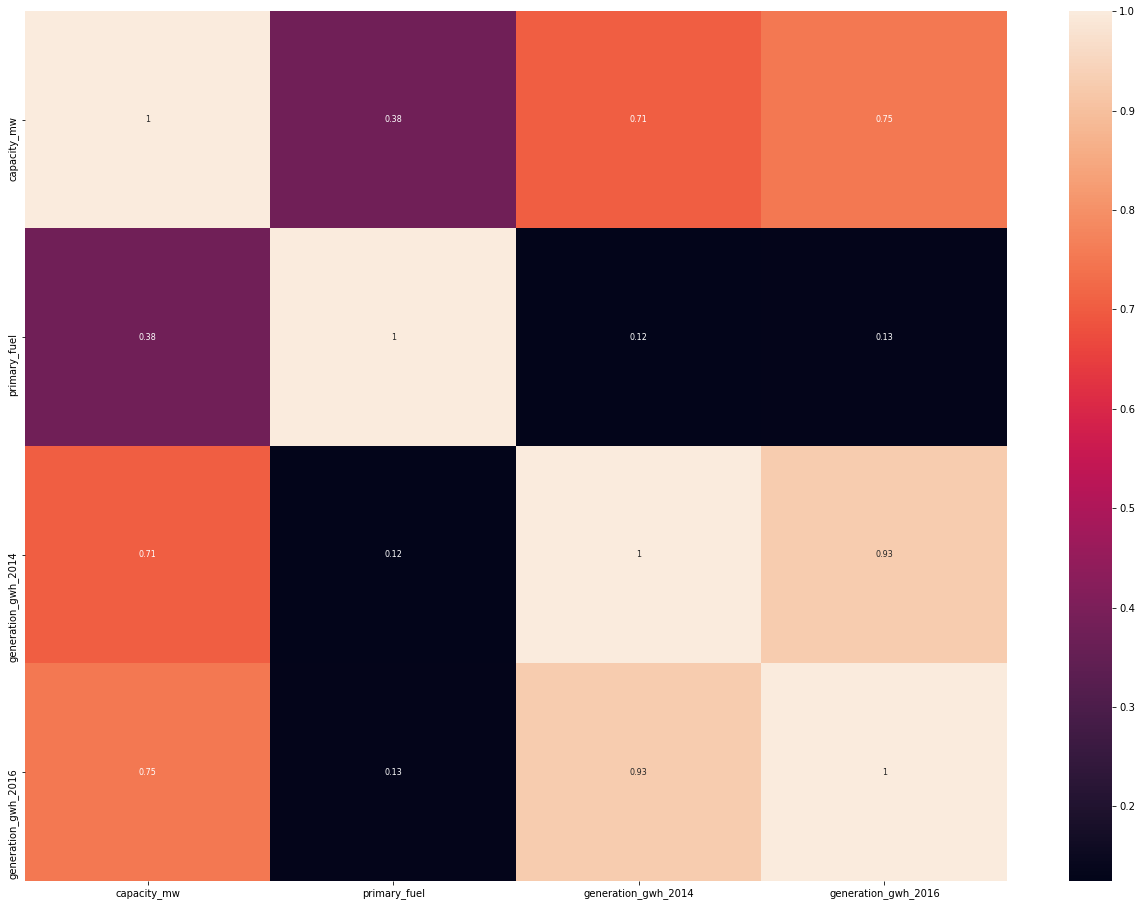

In [25]:
data_corr = data.corr().abs()
plt.figure (figsize = (22,16))
sns.heatmap(data_corr,annot = True, annot_kws = {'size':8}) 
plt.show

There is collinearity between 2014 and 2016 data, but not in high level.

## Data Distribution

In [26]:
class_data = data['primary_fuel']

### Visualisation of categorical variable

1.0    259
3.0    250
6.0    127
7.0    123
2.0     69
0.0     50
5.0     21
4.0      9
Name: primary_fuel, dtype: int64


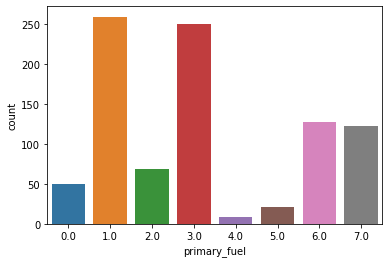

In [27]:
ax = sns.countplot(x = 'primary_fuel', data = data)
print(data['primary_fuel'].value_counts())

- By using Biomass, electricity is generated by 50 plants
- By using Coal, electricity is generated by 259 plants
- By using Gas, electricity is generated is by 69 plants
- By using Hydro, electricity is generated is by 250 plants
- By using Nuclear, electricity is generated is by 9 plants
- By using Oil, electricity is generated is by 21 plants
- By using Solar, electricity is generated is by 127 plants
- By using Wind, electricity is generated is by 123 plants

### Visualisation of continuous variable

In [28]:
continuous_data = data.drop(['primary_fuel'],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

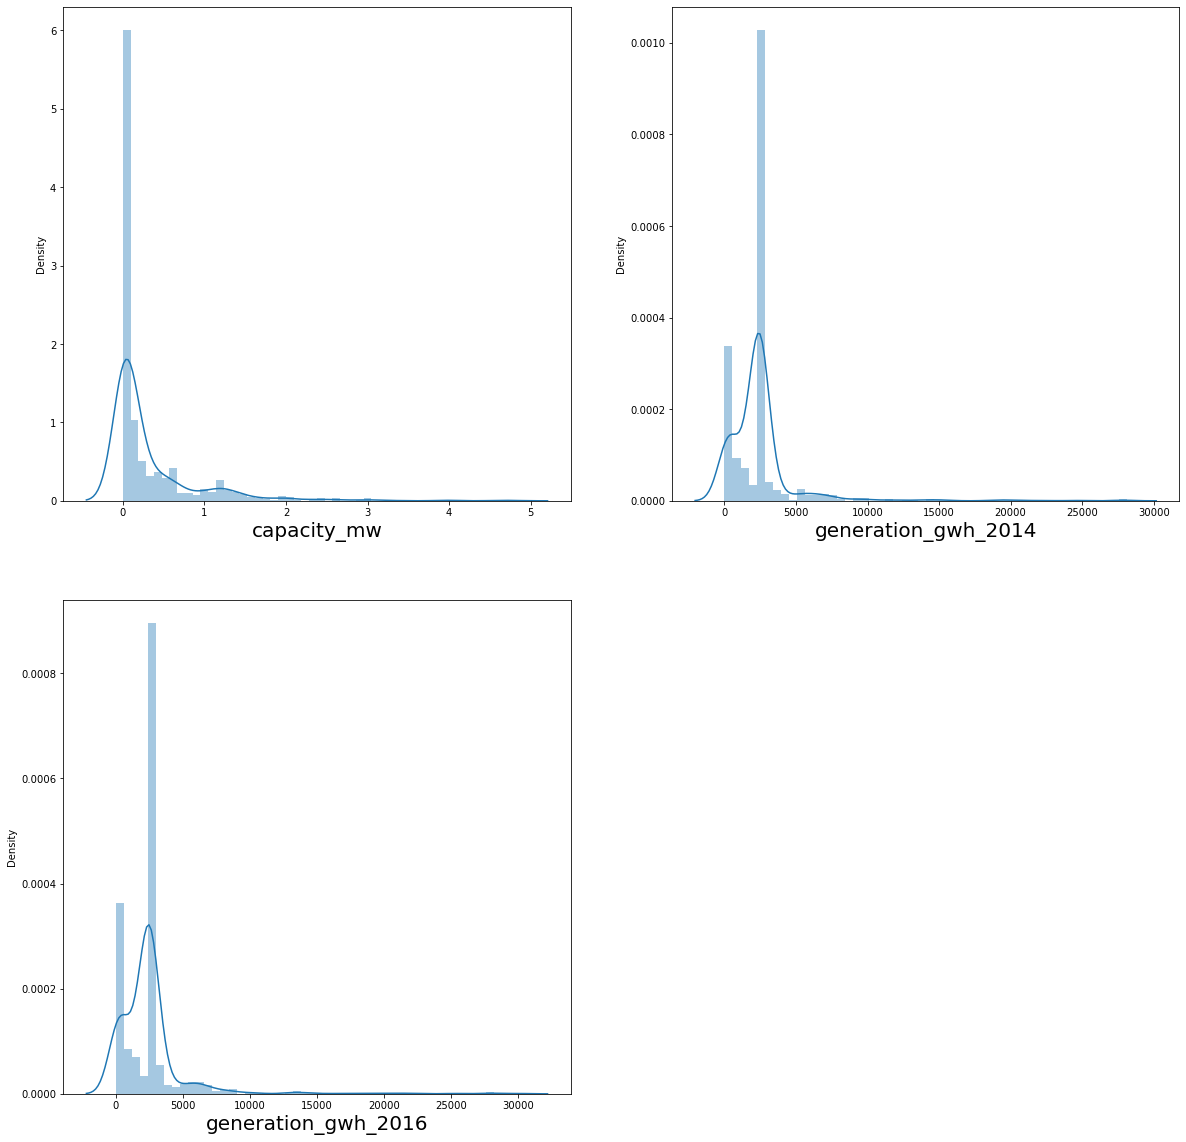

In [29]:
plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in continuous_data:
    if plotnumber <=4:
        ax =  plt.subplot(2,2,plotnumber)
        sns.distplot(continuous_data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

All 3 data are skewed

## Treating Outliers

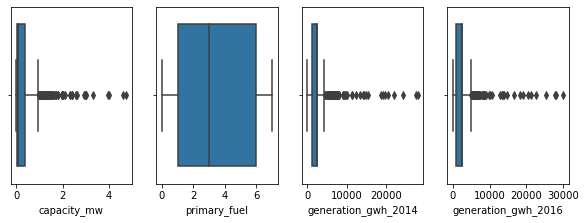

In [30]:
plt.figure(figsize=(10,15))
graph = 1
for column in data:
    if graph<=16:
        ax = plt.subplot(4,4,graph)
        sns.boxplot(data[column],orient = 'V')
        plt.xlabel(column, fontsize=10)
    graph+=1
plt.show()

There are more outliers in capacity_mw, generation_gwh_2014, generation_gwh_2016

### Quantifying

In [31]:
from scipy.stats import zscore

In [32]:
(np.abs(zscore(data))<3).all()

False

In [33]:
data['generation_gwh_2014_zscore'] = zscore(data['generation_gwh_2014'])
data['is_outlier'] = data['generation_gwh_2014_zscore'].apply(lambda x: x<=-3 or x>=3)
data[data['is_outlier']]

,capacity_mw,primary_fuel,generation_gwh_2014,generation_gwh_2016,generation_gwh_2014_zscore,is_outlier
144,2.92,1.0,11385.842,13675.44,3.365545,True
159,1.82,1.0,11466.000,8197.00,3.395636,True
210,2.10,1.0,12467.000,12732.00,3.771401,True
309,2.34,1.0,14471.000,14834.80,4.523684,True
365,2.60,1.0,18807.000,19078.00,6.151378,True
494,4.62,1.0,28127.000,28078.00,9.650018,True
495,4.00,1.0,24501.000,25303.00,8.288852,True
649,3.00,1.0,19784.000,20486.00,6.518134,True
658,2.60,1.0,19224.000,18357.00,6.307916,True
696,3.96,1.0,15069.000,27671.00,4.748168,True


There are more outliers

In [34]:
data['generation_gwh_2016_zscore'] = zscore(data['generation_gwh_2016'])
data['is_outlier'] = data['generation_gwh_2016_zscore'].apply(lambda x: x<=-3 or x>=3)
data[data['is_outlier']]

,capacity_mw,primary_fuel,generation_gwh_2014,generation_gwh_2016,generation_gwh_2014_zscore,is_outlier,generation_gwh_2016_zscore
15,2.63,1.0,9670.879,13227.35235,2.721764,True,3.744482
144,2.92,1.0,11385.842,13675.44000,3.365545,True,3.900223
210,2.10,1.0,12467.000,12732.00000,3.771401,True,3.572314
309,2.34,1.0,14471.000,14834.80000,4.523684,True,4.303178
365,2.60,1.0,18807.000,19078.00000,6.151378,True,5.777973
494,4.62,1.0,28127.000,28078.00000,9.650018,True,8.906075
495,4.00,1.0,24501.000,25303.00000,8.288852,True,7.941577
649,3.00,1.0,19784.000,20486.00000,6.518134,True,6.267347
658,2.60,1.0,19224.000,18357.00000,6.307916,True,5.527378
696,3.96,1.0,15069.000,27671.00000,4.748168,True,8.764615


There are more outliers.
    - Since there are more outliers in both  generation_gwh_2014 and generation_gwh_2016, Check for skewness

## Checking skewness

In [35]:
data.skew()

capacity_mw                   3.193257
primary_fuel                  0.471141
generation_gwh_2014           5.041961
generation_gwh_2016           5.071758
generation_gwh_2014_zscore    5.041961
is_outlier                    7.344801
generation_gwh_2016_zscore    5.071758
dtype: float64

There is high level of skewness

In [36]:
data.skew().sort_values()

primary_fuel                  0.471141
capacity_mw                   3.193257
generation_gwh_2014           5.041961
generation_gwh_2014_zscore    5.041961
generation_gwh_2016           5.071758
generation_gwh_2016_zscore    5.071758
is_outlier                    7.344801
dtype: float64

There is high amount of skewness is present. So, treat it.

## Treating the skewness

In [37]:
q1 = data['generation_gwh_2014'].quantile (0.25)
q3 = data['generation_gwh_2014'].quantile (0.75)
iqr = q3 - q1

In [38]:
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
data['generation_gwh_2014'] = np.where(data['generation_gwh_2014'] > upper_whisker, upper_whisker , np.where(data['generation_gwh_2014'] < lower_whisker, lower_whisker, data['generation_gwh_2014']))

Thus the skewness is treated for generation_gwh_2014

In [39]:
q1 = data['capacity_mw'].quantile (0.25)
q3 = data['capacity_mw'].quantile (0.75)
iqr = q3 - q1

In [40]:
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
data['capacity_mw'] = np.where(data['capacity_mw'] > upper_whisker, upper_whisker , np.where(data['capacity_mw'] < lower_whisker, lower_whisker, data['capacity_mw']))

Thus the skewness is treated for capacity_mw

In [41]:
q1 = data['generation_gwh_2016'].quantile (0.25)
q3 = data['generation_gwh_2016'].quantile (0.75)
iqr = q3 - q1

In [42]:
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
data['generation_gwh_2016'] = np.where(data['generation_gwh_2016'] > upper_whisker, upper_whisker , np.where(data['generation_gwh_2016'] < lower_whisker, lower_whisker, data['generation_gwh_2016']))

Thus the skewness is treated for generation_gwh_2016

# Model building for Capacity

In [43]:
df = pd.DataFrame()
df = data.copy()

Copy the dataframe to another variable to find solution for fuel_type

## Model building

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

Importing necessary libraries needed

In [45]:
x = data.drop(columns = ['capacity_mw'])
y = data['capacity_mw']

Data is split into target and variables

### Standardise the data

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

Data is standardised

In [48]:
regression = LinearRegression()

Instantiate LinearRegression

In [49]:
maxreg = 0 
maxrs = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    acc = LR.score(x_test,y_test)
    if acc>maxreg:
        maxreg = acc
        maxrs = i
print('Best regression score is:',maxreg,'on Random State',maxrs)

Best regression score is: 0.5378442755184886 on Random State 8


Best regression score is 0.53 at 8 random state

In [50]:
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.20,random_state=8)

Check with all the models where we get good score

## Linear Regression

In [51]:
LR = LinearRegression()
LR.fit(x_train,y_train)
lr = LR.score(x_test,y_test)
print('Regression Score:',lr)

y_pred = LR.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.5378442755184886
Mean Absolute Error: 0.16432708342004337
Mean Squared Error: 0.047867491976403186


## Decision Tree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dtt = dt.score(x_test,y_test)
print('Regression Score:',dtt)

y_pred = dt.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.847352237100129
Mean Absolute Error: 0.06678758364595727
Mean Squared Error: 0.015810397185976616


## Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_ = rfr.score(x_test,y_test)
print('Regression Score:',rfr_)

y_pred = rfr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.9026124676464103
Mean Absolute Error: 0.05759925605276112
Mean Squared Error: 0.01008685314623567


Random Forest Regressor is the best model for this dataset with Regression score is 89

## Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score

sc = cross_val_score(LR,x,y,cv=5)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=5)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rfr,x,y,cv=5)
print('RFR cvs:',sc2.mean())

LR cvs: 0.39028766213951005
DT cvs: 0.7350360895005358
RFR cvs: 0.8200496492578138


The cross validation score hows that Random Forest Regrssor is neither underfitting nor overfitting the model. So, continue with hyper parameter tuning.

## Hyper parameter Tuning

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

Import necessary libraries

In [56]:
params = {'n_estimators': [40,47,49,50], 'learning_rate':[0.30,0.40,0.45],'loss' : ['exponential'],'random_state' : [8]} 
rnd_search = RandomizedSearchCV (AdaBoostRegressor(), cv = 5, param_distributions = params,n_iter = 10,n_jobs=1)
print(rnd_search.fit(x_train,y_train))
print('Best Estimator:', rnd_search.best_estimator_)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'loss': ['exponential'],
                                        'n_estimators': [40, 47, 49, 50],
                                        'random_state': [8]})
Best Estimator: AdaBoostRegressor(learning_rate=0.3, loss='exponential', n_estimators=40,
                  random_state=8)


Check the best estimator and imply it

In [57]:
from sklearn import metrics

ada = AdaBoostRegressor(loss='exponential',learning_rate=0.3,n_estimators=47,random_state=8)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

print('Accuracy post tuning')
print(metrics.r2_score(y_test,y_pred))

Accuracy post tuning
0.7881927785266805


Accuracy post tuning the parameters is 0.78. Since this is low compared to Random Forest Regressor score, use the actual rfr and save the model

## Save the model

In [58]:
import joblib
joblib.dump(rfr,'Global_Power_Plant_Database_capacity.pkl')

['Global_Power_Plant_Database_capacity.pkl']

Thus the model is saved for capacity_gw

# Model building for Primary fuel

## Model building

In [59]:
x = df.drop(columns = ['primary_fuel'])
y = df['primary_fuel']

Data is split into target and variables

### Standardise the data

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

Data is standardised

## Treat the imbalanced data

In [62]:
from imblearn.over_sampling import SMOTE
from collections import Counter

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = 40)
print('Training Outcome: \n',y_train.value_counts())

Training Outcome: 
 1.0    207
3.0    198
7.0    102
6.0    102
2.0     53
0.0     40
5.0     17
4.0      7
Name: primary_fuel, dtype: int64


In [63]:
ssm = SMOTE()
ove_sam = SMOTE({1.0: 207, 3.0: 206, 6.0: 200, 7.0: 210, 2.0: 200, 0.0: 210, 5.0: 210, 4.0: 200})
x_train_ns,y_train_ns = ove_sam.fit_resample(x_train,y_train)

print ('After fit {}'.format (Counter(y_train_ns)))

After fit Counter({7.0: 210, 0.0: 210, 5.0: 210, 1.0: 207, 3.0: 206, 6.0: 200, 4.0: 200, 2.0: 200})


In [64]:
regression = LinearRegression()

Instantiate LinearRegression

In [65]:
maxreg = 0 
maxrs = 0
for i in range(1,300):
    x_train_ns,x_test,y_train_ns,y_test = train_test_split(x,y,test_size=.20, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train_ns,y_train_ns)
    acc = LR.score(x_test,y_test)
    if acc>maxreg:
        maxreg = acc
        maxrs = i
print('Best regression score is:',maxreg,'on Random State',maxrs)

Best regression score is: 0.3522966564376332 on Random State 264


Best regression score is 0.352 at 264 random state

In [66]:
x_train_ns,x_test,y_train_ns,y_test = train_test_split (x,y,test_size=0.20,random_state=264)

Check with all the models where we get good score

## Linear Regression

In [67]:
LR = LinearRegression()
LR.fit(x_train_ns,y_train_ns)
lr = LR.score(x_test,y_test)
print('Regression Score:',lr)

y_pred = LR.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.3522966564376332
Mean Absolute Error: 1.3802920837529216
Mean Squared Error: 3.108541952546194


## Decision Tree Regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train_ns,y_train_ns)
dtt = dt.score(x_test,y_test)
print('Regression Score:',dtt)

y_pred = dt.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.3388449449677423
Mean Absolute Error: 1.0775094653245914
Mean Squared Error: 3.173101152144762


## Random Forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train_ns,y_train_ns)
rfr_ = rfr.score(x_test,y_test)
print('Regression Score:',rfr_)

y_pred = rfr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.394681098107467
Mean Absolute Error: 1.122421053256519
Mean Squared Error: 2.905125038961528


Random Forest Regressor is the best model for this dataset with Regression score 39

## Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score

sc = cross_val_score(LR,x,y,cv=5)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=5)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rfr,x,y,cv=5)
print('RFR cvs:',sc2.mean())

LR cvs: 0.223556635062698
DT cvs: 0.08651841916998868
RFR cvs: 0.21634679694221007


The cross validation score shows that Linear Regression model is good with minimum difference. But, check by regularisation technique

## Regularisation

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [72]:
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state': list(range(0,100)),'max_iter':[10000],'normalize':[False]}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

clf.best_params_

{'alpha': 0.01, 'max_iter': 10000, 'normalize': False, 'random_state': 0}

In [73]:
ls = Lasso(alpha=0.01,random_state=0,max_iter = 10000, normalize= False)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
print(lss)

cv_score = cross_val_score(ls,x,y,cv=5)
cv_mean = cv_score.mean()
print(cv_mean)

0.3583435161553745
0.22407819700132162


The Lasso score is 0.35 and the CV score is 0.22 which is of the same as Linear Regression model. So, it is confirmed that the model is performing good.

## Hyper parameter Tuning

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

Import necessary libraries

In [75]:
params = {'n_estimators': [40,47,49,50], 'learning_rate':[0.30,0.40,0.45],'loss' : ['exponential'],'random_state' : [0]} 
rnd_search = RandomizedSearchCV (AdaBoostRegressor(), cv = 5, param_distributions = params,n_iter = 10,n_jobs=1)
print(rnd_search.fit(x_train_ns,y_train_ns))
print('Best Estimator:', rnd_search.best_estimator_)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'loss': ['exponential'],
                                        'n_estimators': [40, 47, 49, 50],
                                        'random_state': [0]})
Best Estimator: AdaBoostRegressor(learning_rate=0.3, loss='exponential', n_estimators=40,
                  random_state=0)


Check the best estimator and imply it

In [76]:
from sklearn import metrics

ada = AdaBoostRegressor(loss='exponential',learning_rate=0.3,n_estimators=40,random_state=0)
ada.fit(x_train_ns,y_train_ns)
y_pred = ada.predict(x_test)

print('Accuracy post tuning')
print(metrics.r2_score(y_test,y_pred))

Accuracy post tuning
0.41333855554687593


Accuracy post tuning the parameters is 0.41. Since this is high compared to Linear Regression score, use this ada.fit to save the model

## Save the model

In [77]:
import joblib
joblib.dump(ada,'Global_Power_Plant_Database_fuel.pkl')

['Global_Power_Plant_Database_fuel.pkl']

Thus the model is saved for primary_fuel